# o1 images analysis in AzureAI Foundry

> https://azure.microsoft.com/en-us/blog/introducing-o1-openais-new-reasoning-model-series-for-developers-and-enterprises-on-azure/?msockid=2e39c66c693c66a5151fd200687567d0

In [1]:
import base64
import os
import requests
import sys
import time

from datetime import datetime
from dotenv import load_dotenv
from io import BytesIO
from openai import AzureOpenAI
from PIL import Image

In [2]:
import sys

In [3]:
print(f"Today is {datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 18-Apr-2025 07:41:07


In [4]:
load_dotenv("azure.env")

endpoint = os.getenv('endpoint')
key = os.getenv('key')
deployment_name = os.getenv('deployment_name')

api_version = '2025-03-01-preview'

## url images

In [5]:
def o1_imageurl(prompt, image_url, effort='low'):
    """
    Generates a response from Azure OpenAI o1 using a text prompt and an image URL.

    Args:
        prompt (str): The text prompt to be sent to the AI model.
        imageurl (str): The URL of the image to be included in the request.
        effort (str, optional): The reasoning effort level for the AI model. Defaults to 'low'.

    Returns:
        str: The content of the AI model's response.
    """
    # client
    client = AzureOpenAI(
        api_key=key,
        api_version=api_version,
        base_url=f"{endpoint}/openai/deployments/{deployment_name}")

    # Results
    response = client.chat.completions.create(
        model=deployment_name,
        messages=[
            {
                "role": "system",
                "content": "You are an AI helpful assistant."
            },
            {
                "role":
                "user",
                "content": [{
                    "type": "text",
                    "text": prompt,
                }, {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    },
                }]
            },
        ],
        reasoning_effort=effort,  # low, medium or high
    )

    return response.choices[0].message.content

In [6]:
def o1_imagefile(prompt, image_file, effort='low'):
    """
    Generates a response from Azure OpenAI o1 using a text prompt and a local image file.

    Args:
        prompt (str): The text prompt to be sent to the AI model.
        image_path (str): The file path to the local image to be included in the request.
        effort (str, optional): The reasoning effort level for the AI model. Defaults to 'low'.

    Returns:
        str: The content of the AI model's response.
    """
    # Transforming local image to base64
    with open(image_file, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode('utf-8')

    # link to base64
    image_uri = f"data:image/jpeg;base64,{base64_image}"

    # client
    client = AzureOpenAI(
        api_key=key,
        api_version=api_version,
        base_url=f"{endpoint}/openai/deployments/{deployment_name}")

    # Results
    response = client.chat.completions.create(
        model=deployment_name,
        messages=[
            {
                "role": "system",
                "content": "You are an AI helpful assistant."
            },
            {
                "role":
                "user",
                "content": [{
                    "type": "text",
                    "text": prompt,
                }, {
                    "type": "image_url",
                    "image_url": {
                        "url": image_uri,
                    },
                }]
            },
        ],
        reasoning_effort=effort,  # low, medium or high
    )

    return response.choices[0].message.content

## Examples

In [7]:
prompt = "What are the car model and color?"

imageurl = "https://www.moteurnature.com/zvisu/1812/99/Renault-Scenic-Etech.jpg"

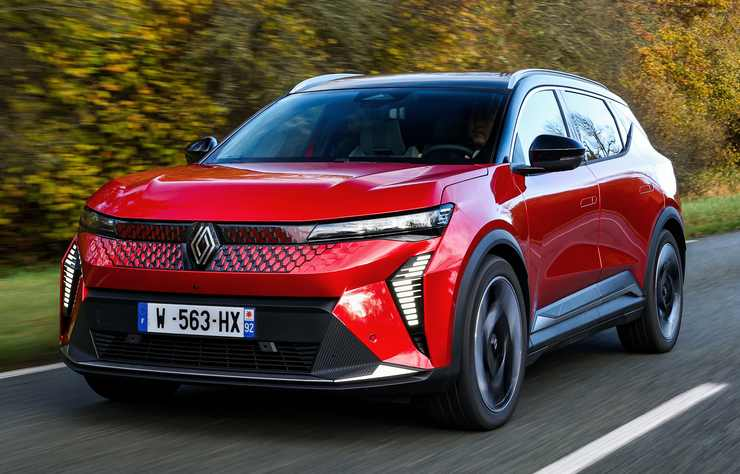

In [8]:
img = Image.open(BytesIO(requests.get(imageurl).content))
img

In [9]:
start = time.time()

resp = o1_imageurl(prompt, imageurl, effort="low")
print(resp)

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\nElapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")

It’s a new‐generation Renault Scénic E‐Tech (an all‐electric crossover) finished in a bright metallic red paint.

Elapsed time = 0 minutes and 29 seconds


In [10]:
prompt = "What is the total amount? What are the date and the order id?"
imageurl = "https://templates.invoicehome.com/modele-facture-fr-pur-750px.png"

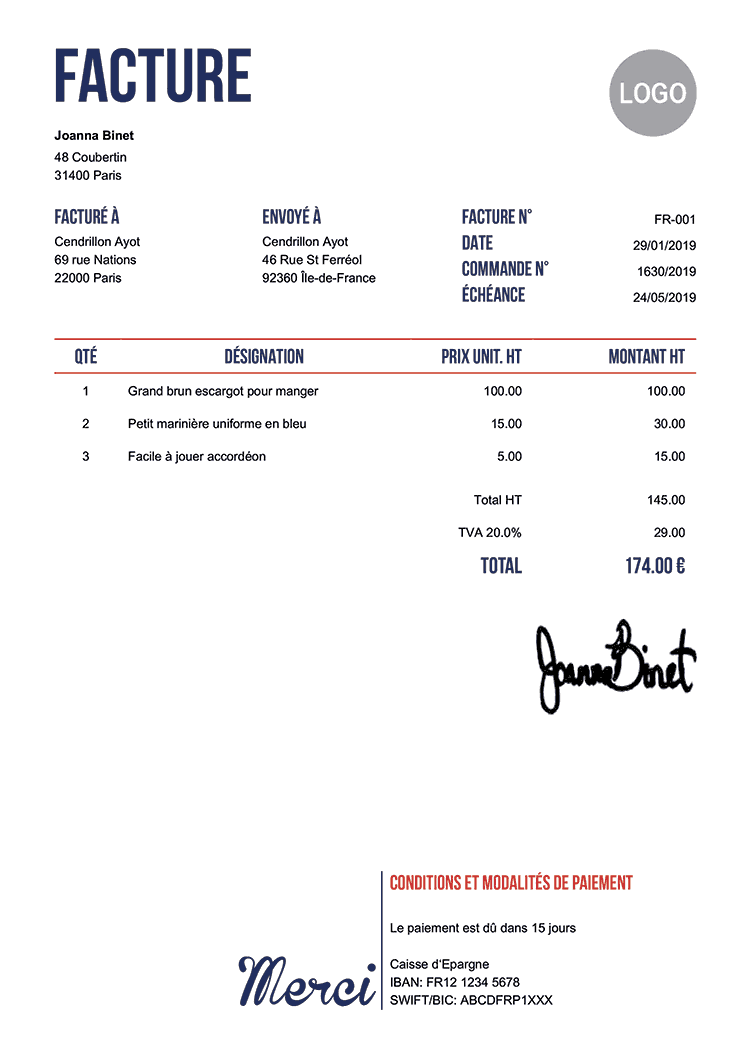

In [11]:
img = Image.open(BytesIO(requests.get(imageurl).content))
img

In [12]:
start = time.time()

resp = o1_imageurl(prompt, imageurl, effort="low")
print(resp)

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\nElapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")

The total amount is €174.00, the date is January 29, 2019, and the order ID is 1630/2019.

Elapsed time = 0 minutes and 10 seconds


## Local image file

In [13]:
prompt = "How many rooms? How many bedrooms? How many doors and windows?"

image_path = "plan.jpg"

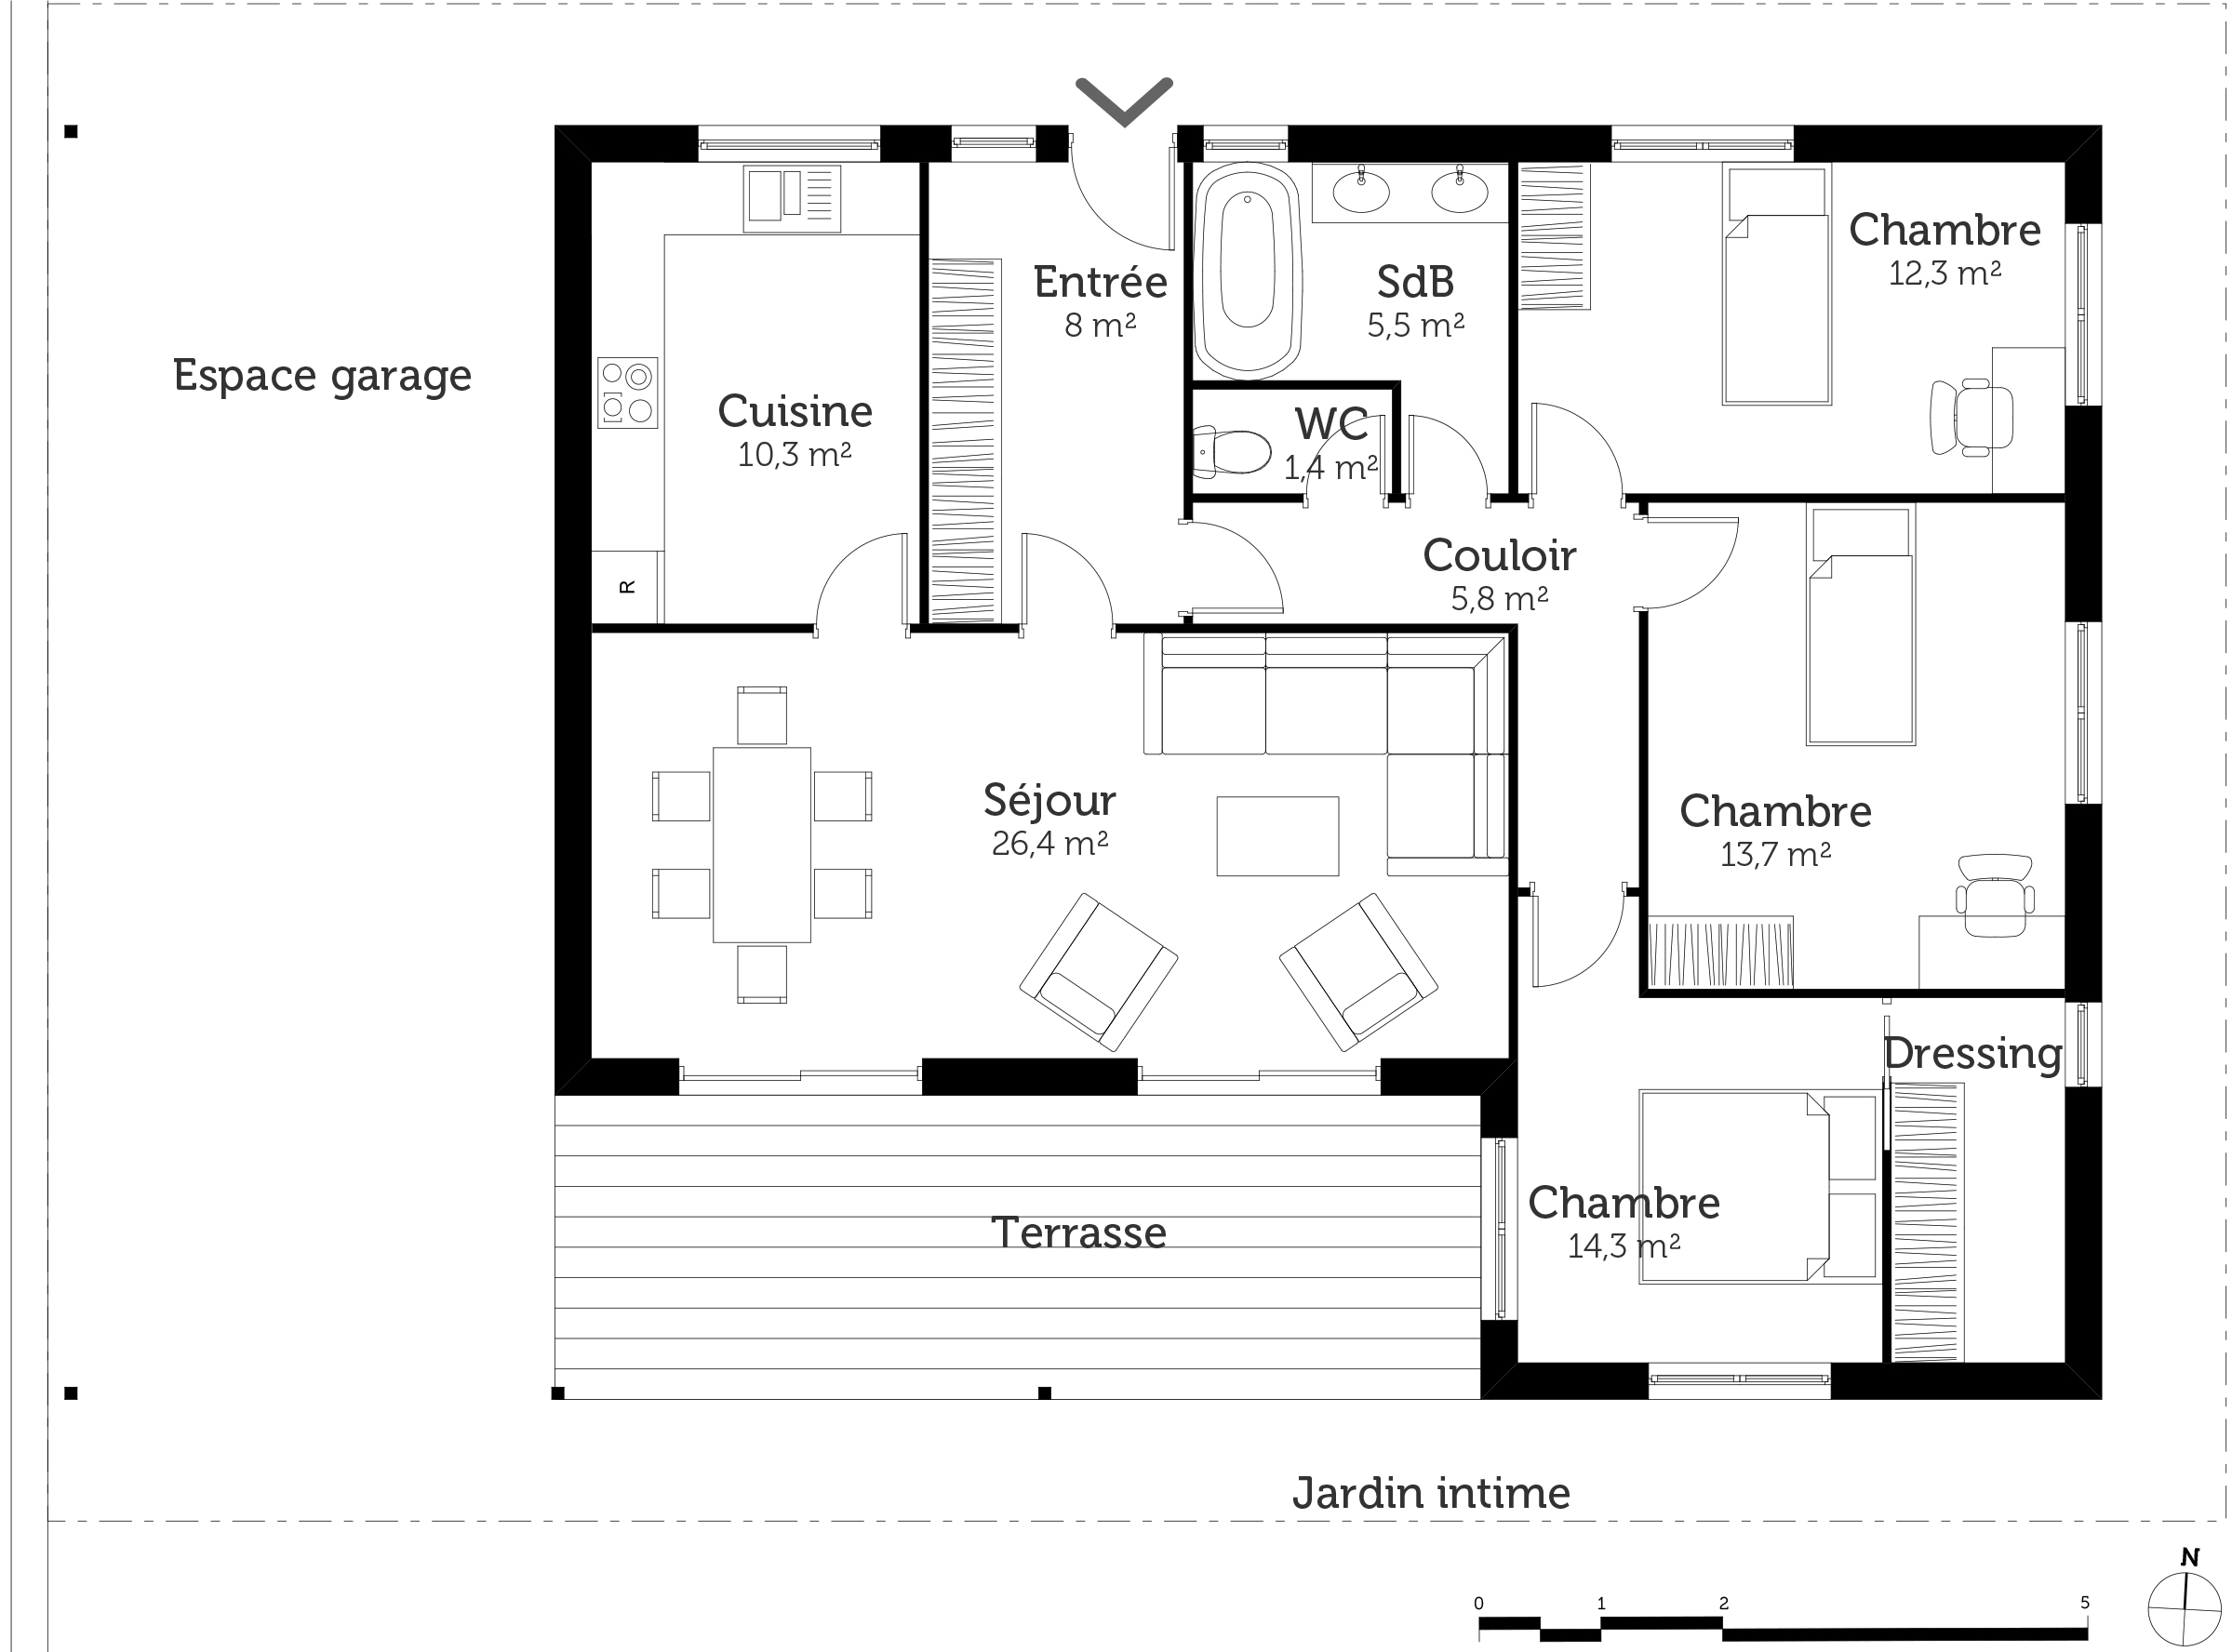

In [14]:
img = Image.open(image_path)
img

In [15]:
start = time.time()

resp = o1_imagefile(prompt, image_path, effort="high")
print(resp)

elapsed = time.time() - start
minutes, seconds = divmod(elapsed, 60)
print(f"\nElapsed time = {minutes:.0f} minutes and {seconds:.0f} seconds")

A straightforward way to count is to treat every enclosed space (including the hall, WC, bath, and dressing) as a “room.”  By that reading, you get ten rooms in total:

1) Entrée  
2) Cuisine (Kitchen)  
3) Séjour (Living/Dining)  
4) Couloir (Hall)  
5) WC  
6) Salle de bain (Bathroom)  
7) Chambre 1  
8) Chambre 2  
9) Chambre 3  
10) Dressing  

Of these, three are bedrooms.  As for openings, there are typically ten doors (counting the exterior front door, interior doors to each room, and the terrace door) and six windows (one each in the kitchen, WC, bathroom, and the three bedrooms).

Elapsed time = 1 minutes and 13 seconds
